In [57]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('../input/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    crime.head()
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
    crime = crime.ix[:,columns_to_keep].dropna()
    crime.head()
    X_crime = crime.ix[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

def classifica(modelo, scaler, previsor, classe):
    scaler = scaler()
    X_train, X_test, y_train, y_test = train_test_split(previsor,classe,
                                                    test_size=0.20, 
                                                    random_state=12)
    modelo.fit(X_train, y_train)
    print('Score on Test: ', modelo.score(X_test,y_test))
    print('Score on Train: ', modelo.score(X_train,y_train))
    return modelo

def KFoldEstratificado(Modelo, Previsores, Classe, Folds, Metrica):
  stratifiedFolds = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=100) 
  score_cruzado = cross_val_score( Modelo, Previsores, Classe, cv=Folds)
  results = []
  for index_train, index_test in stratifiedFolds.split(Previsores, Classe, Classe):
      Modelo.fit(Previsores[index_train], Classe[index_train])
      predict = Modelo.predict(Previsores[index_test])
      metric = Metrica(Classe[index_test], predict)
      results.append(metric)
  return [[Metrica.__name__ , mean(results) ], [cross_val_score.__name__, mean(score_cruzado)]]

import graphviz
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

In [45]:
import numpy as np # linear algebra
from numpy import mean
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier

In [3]:
x, y =load_crime_dataset()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [4]:
lasso_reg = Lasso(alpha=2.0, max_iter=10000)
ridge_reg = Ridge(alpha=2.0, max_iter=10000)
linear_reg = LinearRegression(n_jobs=-1)

In [5]:
lasso = classifica(lasso_reg, MinMaxScaler, x, y)
linear = classifica(linear_reg, MinMaxScaler, x, y)
ridge =classifica(ridge_reg, MinMaxScaler, x, y)

Score on Test:  0.5979947199245123
Score on Train:  0.668901619081754
Score on Test:  0.5866992917020282
Score on Train:  0.6738706308620358
Score on Test:  0.5910291862726919
Score on Train:  0.6730336204909747


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
polinomial = PolynomialFeatures(degree=2)
x_pol = polinomial.fit_transform(x.values)

In [ ]:
print('Lasso')
lasso = classifica(lasso_reg, StandardScaler, x_pol, y)
print('Linear')
linear = classifica(linear_reg, StandardScaler, x_pol, y)
print('Ridge')
ridge =classifica(ridge_reg, StandardScaler, x_pol, y)

In [6]:
#load_breast_cancer
x_bc, y_bc = load_breast_cancer(return_X_y=True)
log_cls = LogisticRegression(n_jobs=-1)
svm_cls = SVC(gamma='scale')
knn_cls = KNeighborsClassifier()

In [7]:
classifica(log_cls, StandardScaler, x_bc, y_bc)

Score on Test:  0.9385964912280702
Score on Train:  0.9604395604395605


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
classifica(svm_cls, StandardScaler, x_bc, y_bc)

Score on Test:  0.8859649122807017
Score on Train:  0.9274725274725275


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
cv = cross_val_score(svm_cls, x_bc, y_bc, cv=10)

In [10]:
cv.mean()

0.9158672543427535

In [11]:
KFoldEstratificado(knn_cls, x_bc, y_bc, 10, accuracy_score)

[['accuracy_score', 0.9244576959640481],
 ['cross_val_score', 0.9298429262812202]]

In [26]:
param_range = np.linspace(1,3, num=5)
train_scores, test_scores = validation_curve(knn_cls, x_bc, y_bc, param_name='n_neighbors',
                                             param_range=np.arange(1,40), cv=10)

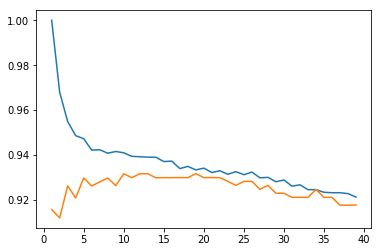

In [27]:
plt.plot(np.arange(1,40),train_scores.mean(axis=1))
plt.plot(np.arange(1,40),test_scores.mean(axis=1))
plt.show()

In [17]:
test_scores.mean()

0.6274274047186933

In [46]:
dtc = DecisionTreeClassifier()
classificador = classifica(dtc, StandardScaler, x_bc, y_bc)

Score on Test:  0.9473684210526315
Score on Train:  1.0


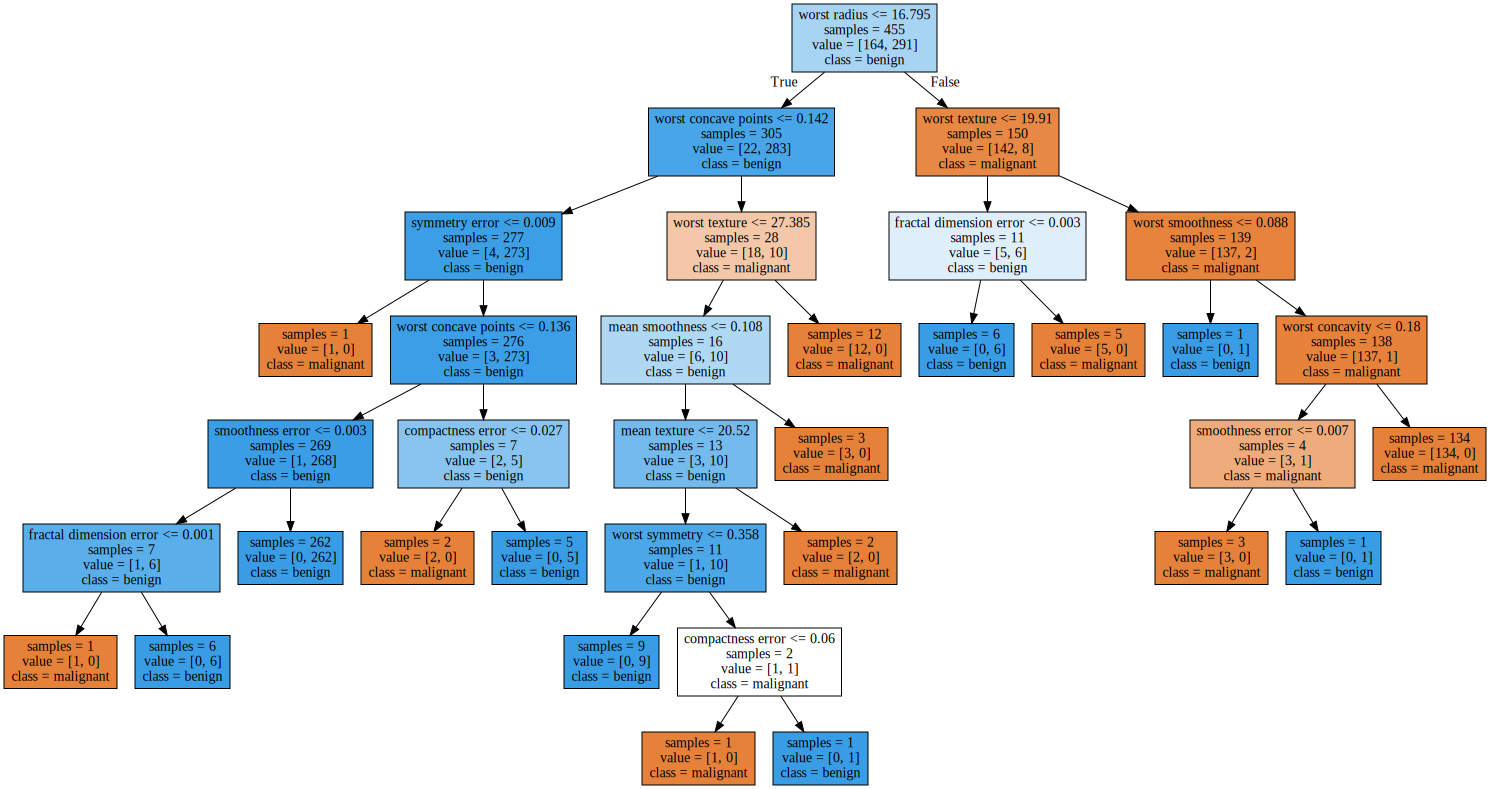

In [56]:
plot_decision_tree(classificador, load_breast_cancer()['feature_names'], load_breast_cancer()['target_names'])

In [38]:
load_breast_cancer()['target_names']

array(['malignant', 'benign'], dtype='<U9')